In [59]:
import numpy as np
import pandas as pd
from skimpy import skim

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import re
import nltk
import string
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [16]:
df=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\Machine Learning\nlp\sentimentdataset.csv')

In [17]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [19]:
df['Platform'].unique()

array([' Twitter  ', ' Instagram ', ' Facebook ', ' Twitter '],
      dtype=object)

In [20]:
df['Country'].unique()

array([' USA      ', ' Canada   ', ' USA        ', ' UK       ',
       ' Australia ', ' India    ', ' USA    ', 'USA', ' Canada    ',
       ' USA       ', ' USA ', ' Canada  ', ' UK ', ' India     ',
       ' Canada ', ' UK        ', ' India ', ' UK   ', ' UK         ',
       ' USA     ', ' Canada     ', ' USA          ', ' India      ',
       ' Australia  ', ' UK           ', ' Canada       ',
       ' Australia   ', ' Australia    ', ' UK            ', ' USA   ',
       ' India       ', ' UK          ', ' USA  ', ' UK      ',
       ' Canada      ', ' India   ', ' Canada          ',
       ' India        ', ' Australia     ', ' Canada        ',
       ' India         ', ' USA           ', ' USA               ',
       ' Canada            ', ' UK                ',
       ' India              ', ' Australia          ',
       ' France            ', ' Brazil            ',
       ' Japan             ', ' Greece            ',
       ' India             ', ' Brazil           ', ' Franc

In [21]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 732    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 15     │ │ int32       │ 6     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Unnamed: 0.1     │   0 │      0 │   366.5 │   211.5 │      0 │   183.8 │  366.5 │  549.2 │   732 │ ▇▇▇▇▇▇  │  │
│ │ Unnamed: 0       │   0 │      0 │   369.7 │   212.4 │      0 │   185.8 │  370.5 │  553.2 │   736 │ ▇▇▇▇▇▇  │  │
│ │ Retweets         │   0 │      0 │   21.51 │   7.061 │      5 │   17.75 │     22 │     25 │    40 │ ▁▃▇▅▂▂  │  │
│ │ Likes            │   0 │      0 │    42.9 │   14.09 │     10 │   34.75 │     43 │     50 │    80 │ ▂▅▇▇▂▂  │  │
│ │ Year             │   0 │      0 │    2020 │   2.802 │   2010 │    2019 │   2021 │   2023 │  2023 │   ▁▂▃▇  │  │
│ │ Month            │   0 │      0 │   6.123 │   3.412 │      1 │       3 │      6 │      9 │    12 │ ▇▅▆▇▆▅  │  │
│ │ Day              │   0 │      0 │    15.5 │   8.475 │      1 │       9 │     15 │     22 │    31 │ ▇▇▇▇▅▇  │  │
│ │ Hour             │   0 │      0 │   15.52 │   4.113 │      0 │      13 │     16 │     19 │    23 │   ▃▇▇▅  │  │
│ └──────────────────┴─────┴────────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Text                      │       0 │          0 │                           16 │                    11987 │  │
│ │ Sentiment                 │       0 │          0 │                          4.8 │                     3481 │  │
│ │ Timestamp                 │       0 │          0 │                            2 │                     1464 │  │
│ │ User                      │       0 │          0 │                            4 │                     2912 │  │
│ │ Platform                  │       0 │          0 │                          3.2 │                     2311 │  │
│ │ Hashtags                  │       0 │          0 │                           12 │                     9003 │  │
│ │ Country                   │       0 │          0 │                          5.9 │                     4303 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── 

EDA

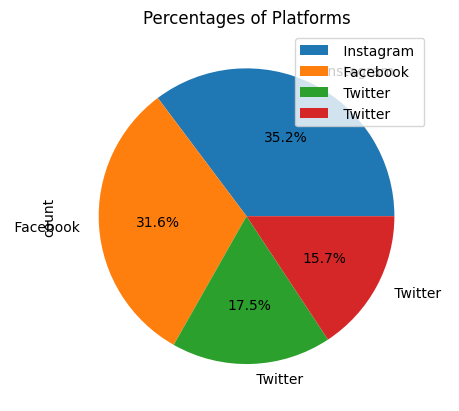

In [22]:
df['Platform'].value_counts().plot.pie(autopct='%1.1f%%',title='Percentages of Platforms',legend=True)
plt.show()

In [24]:
sten = df["Sentiment"].value_counts().head(10).reset_index()
sen = pd.DataFrame(sten)
sen

,Sentiment,count
0,Positive,44
1,Joy,42
2,Excitement,32
3,Neutral,14
4,Contentment,14
5,Happy,14
6,Hopeful,9
7,Sad,9
8,Gratitude,9
9,Curiosity,8


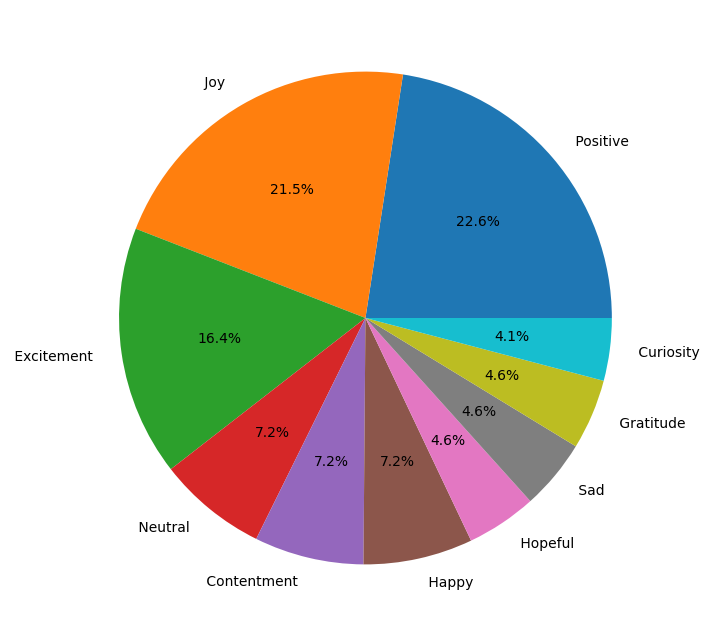

In [26]:
plt.figure(figsize=(10,8))
s = plt.pie(sen["count"], labels = sen["Sentiment"],autopct='%1.1f%%')
plt.show()

In [32]:
k = df["Hashtags"].value_counts().head(10).reset_index()
Hash = pd.DataFrame(k)
Hash

,Hashtags,count
0,#Compassionate #TearsOfEmpathy,3
1,#Proud #ScalingPeaks,3
2,#Hopeful #SeedsOfOptimism,3
3,#Playful #CarnivalEscapade,3
4,#Contentment #TranquilWaters,2
5,#Inspired #TalesToTheStars,2
6,#Inspired #CloudsOfCreativity,2
7,#Dismissive #IndifferencePerformance,2
8,#Indifference #DriftingThroughLife,2
9,#Shame #Injustice,2


C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11728\3364657868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  k = sns.barplot(y = "Hashtags", x = "count", data = Hash, palette = "gist_ncar")


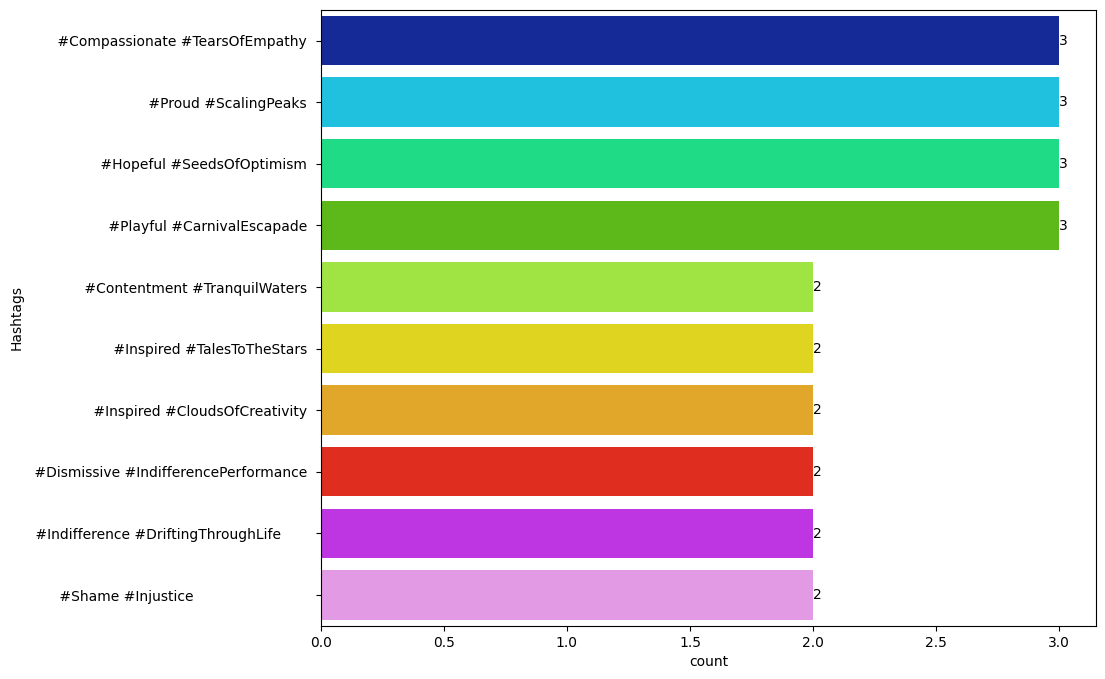

In [33]:
plt.figure(figsize = (10,8))
k = sns.barplot(y = "Hashtags", x = "count", data = Hash, palette = "gist_ncar")
for bars in k.containers:
    k.bar_label(bars)
plt.show()

In [34]:
k = df.groupby("Hashtags")["Retweets"].max().nlargest(10).sort_values(ascending = False).reset_index()
b = pd.DataFrame(k)
b

,Hashtags,Retweets
0,#Anticipation #AdventureAwaits,40.0
1,#Despair #AbyssOfHeartache,40.0
2,#Disappointment #SoccerDefeats,40.0
3,#Elation #RareBookDiscovery,40.0
4,#Emotion #AdeleConcert,40.0
5,#Enthusiasm #JustinBieber,40.0
6,#Excitement #MoviePremiereThrills,40.0
7,#Joy #EndlessSmiles,40.0
8,#Joy #SimpleMoments,40.0
9,#Joy #WorldCupTriumph,40.0


C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11728\1036056842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Retweets", y = "Hashtags", data = b,palette='viridis')


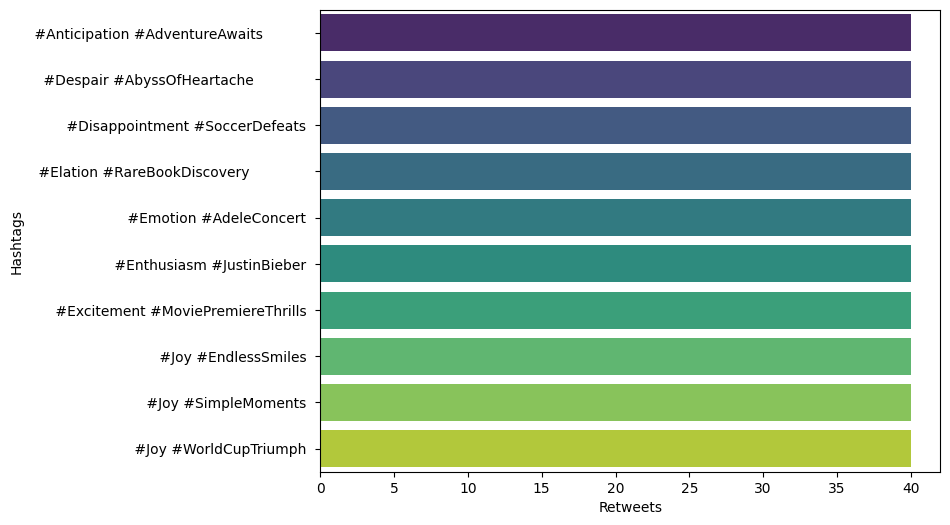

In [37]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Retweets", y = "Hashtags", data = b,palette='viridis')
plt.show()

In [38]:
k = df.groupby("Hashtags")["Likes"].max().nlargest(10).reset_index()
b = pd.DataFrame(k)
b

,Hashtags,Likes
0,#Anticipation #AdventureAwaits,80.0
1,#Despair #AbyssOfHeartache,80.0
2,#Disappointment #SoccerDefeats,80.0
3,#Elation #RareBookDiscovery,80.0
4,#Emotion #AdeleConcert,80.0
5,#Enthusiasm #JustinBieber,80.0
6,#Excitement #MoviePremiereThrills,80.0
7,#Joy #EndlessSmiles,80.0
8,#Joy #SimpleMoments,80.0
9,#Joy #WorldCupTriumph,80.0


C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11728\938035961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Likes", y = "Hashtags", data = b,palette='gist_ncar')


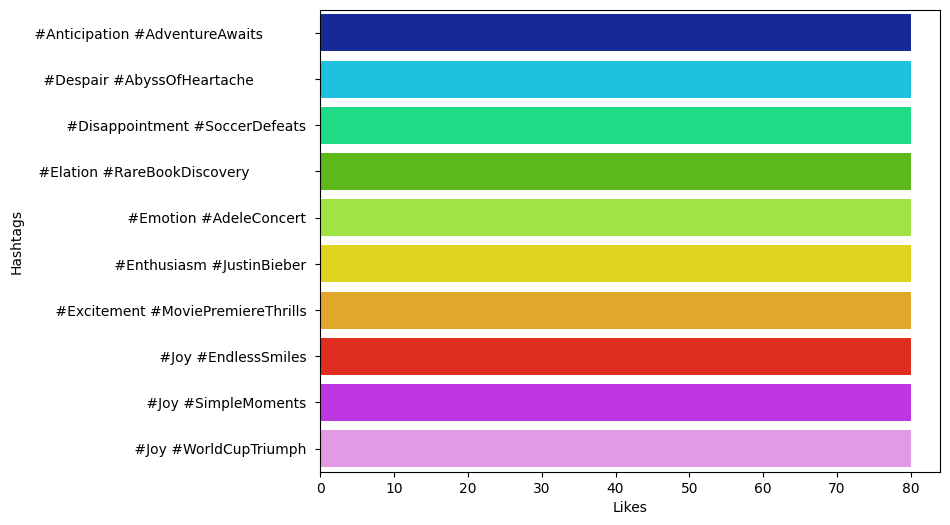

In [39]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Likes", y = "Hashtags", data = b,palette='gist_ncar')
plt.show()

In [40]:
k = df.groupby('Year')['Likes'].sum().reset_index()
ly = pd.DataFrame(k)
ly

,Year,Likes
0,2010,160.0
1,2011,185.0
2,2012,160.0
3,2013,175.0
4,2014,160.0
5,2015,859.0
6,2016,1661.0
7,2017,1785.0
8,2018,2505.0
9,2019,3224.0


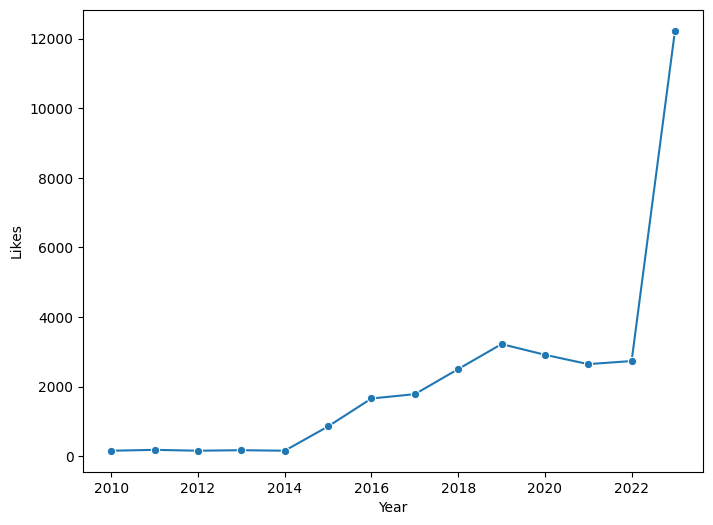

In [44]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year',y='Likes',data=ly,marker='o')
plt.show()

In [45]:
k = df.groupby("Sentiment")["Likes"].sum().nlargest(10).reset_index()
k = pd.DataFrame(k)
k

,Sentiment,Likes
0,Joy,2078.0
1,Positive,1645.0
2,Excitement,1630.0
3,Contentment,706.0
4,Happy,632.0
5,Neutral,589.0
6,Gratitude,465.0
7,Curiosity,379.0
8,Embarrassed,345.0
9,Sad,335.0


C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11728\404219234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment',y='Likes',data=k,palette='gist_ncar')


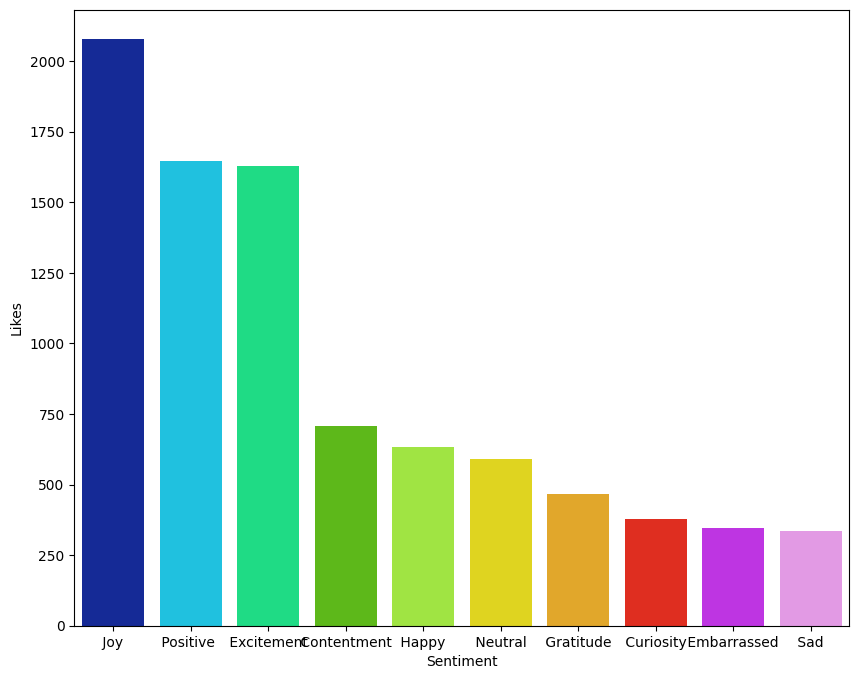

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(x='Sentiment',y='Likes',data=k,palette='gist_ncar')
plt.show()

In [47]:
k = df["Country"].value_counts().nlargest(10).reset_index()
b = pd.DataFrame(k)
b

,Country,count
0,USA,59
1,USA,55
2,UK,49
3,Canada,44
4,Australia,41
5,Canada,34
6,UK,33
7,India,21
8,USA,20
9,Canada,17


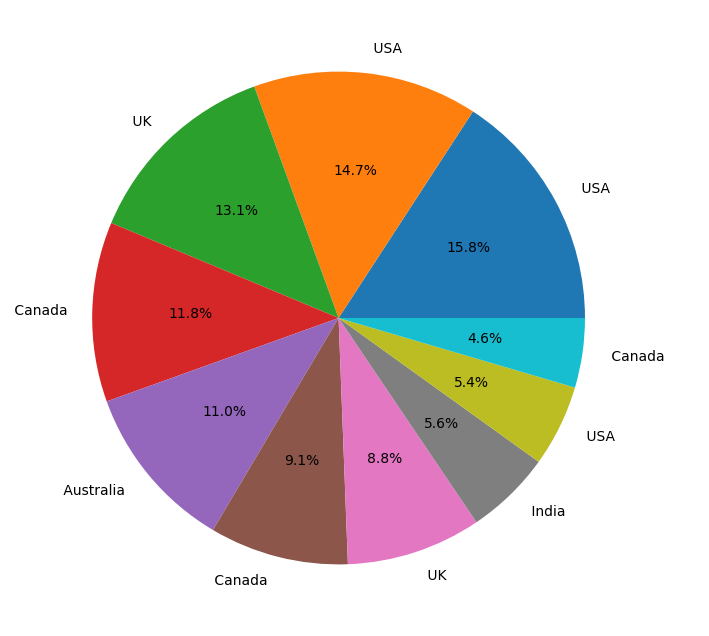

In [48]:
plt.figure(figsize=(12,8))
s = plt.pie(b["count"], labels = b["Country"],autopct='%1.1f%%')
plt.show()

In [51]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saravanan/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saravanan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Saravanan/nltk_data...


True

In [52]:
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "Platform", "Country",  "Timestamp", "User", "Year", "Month", "Day", "Hour"], inplace=True)
df.head()

,Text,Sentiment,Hashtags,Retweets,Likes
0,Enjoying a beautiful day at the park! ...,Positive,#Nature #Park,15.0,30.0
1,Traffic was terrible this morning. ...,Negative,#Traffic #Morning,5.0,10.0
2,Just finished an amazing workout! 💪 ...,Positive,#Fitness #Workout,20.0,40.0
3,Excited about the upcoming weekend getaway! ...,Positive,#Travel #Adventure,8.0,15.0
4,Trying out a new recipe for dinner tonight. ...,Neutral,#Cooking #Food,12.0,25.0


In [53]:
df["Text"] = df["Text"] + df["Hashtags"]
df.drop(columns="Hashtags", inplace=True)
df.head()

,Text,Sentiment,Retweets,Likes
0,Enjoying a beautiful day at the park! ...,Positive,15.0,30.0
1,Traffic was terrible this morning. ...,Negative,5.0,10.0
2,Just finished an amazing workout! 💪 ...,Positive,20.0,40.0
3,Excited about the upcoming weekend getaway! ...,Positive,8.0,15.0
4,Trying out a new recipe for dinner tonight. ...,Neutral,12.0,25.0


In [57]:
corpus = []
lemmatizer = WordNetLemmatizer()

for document in df["Text"]:
    document = re.sub("[^a-zA-Z]", " ", document).lower()
    document = document.split()
    document = [lemmatizer.lemmatize(word) for word in document if word not in set(stopwords.words("english"))]
    document = " ".join(document)
    corpus.append(document)

df["Text"] = corpus

In [60]:
y = df["Sentiment"]
vectorizer = TfidfVectorizer()
X = pd.DataFrame(vectorizer.fit_transform(df["Text"]).toarray(), columns=vectorizer.get_feature_names_out())
X.head()

,ablaze,abstract,abstractart,abyss,abyssofheartache,academic,academicfrustration,acceptance,accepts,accidentally,...,yearning,yearningforconnection,yet,york,young,zen,zenwisdom,zero,zest,zestful
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
y_pred = clf.predict(X_test)
score1 = accuracy_score(y_test, y_pred)
print("Score: ", score1)

Score:  0.3197278911564626


In [64]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [68]:
y_pred1 = clf.predict(X_test)
score2 = accuracy_score(y_test, y_pred1)
print("Score: ", score2)

Score:  0.3197278911564626


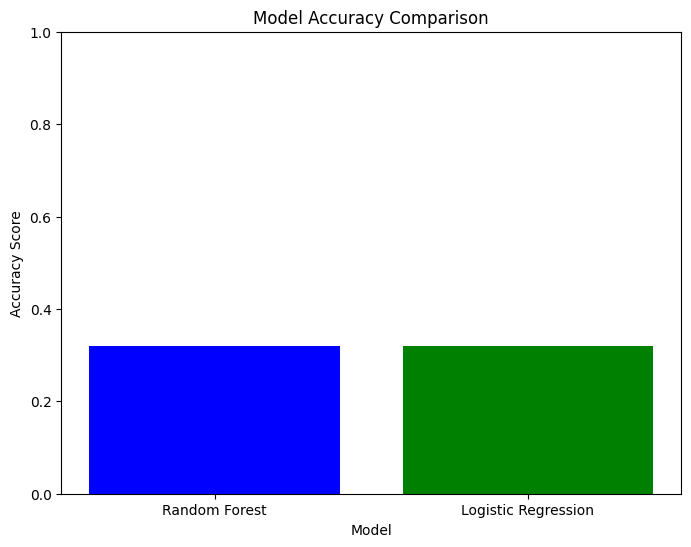

In [69]:
import matplotlib.pyplot as plt

# Store the accuracy scores in a dictionary
model_scores = {'Random Forest': score1, 'Logistic Regression': score2}

# Convert dictionary to DataFrame for easier plotting
scores_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Accuracy'])

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(scores_df['Model'], scores_df['Accuracy'], color=['blue', 'green'])
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.show()
